In [27]:
import requests
import json
from csv import writer

# Filter the locations where primary schools are
url_prsc = 'https://services6.arcgis.com/GB33F62SbDxJjwEL/ArcGIS/rest/services/Vicmap_Features_of_Interest/FeatureServer/8/query?where=FEATURE_CODE+%3D+%27PRSC%27&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&resultType=none&distance=0.0&units=esriSRUnit_Meter&relationParam=&returnGeodetic=false&outFields=&returnGeometry=true&featureEncoding=esriDefault&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=&defaultSR=&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnQueryGeometry=false&returnDistinctValues=false&cacheHint=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pjson&token='
url_sesc = 'https://services6.arcgis.com/GB33F62SbDxJjwEL/ArcGIS/rest/services/Vicmap_Features_of_Interest/FeatureServer/8/query?where=FEATURE_CODE+%3D+%27SESC%27&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&resultType=none&distance=0.0&units=esriSRUnit_Meter&relationParam=&returnGeodetic=false&outFields=&returnGeometry=true&featureEncoding=esriDefault&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=&defaultSR=&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnQueryGeometry=false&returnDistinctValues=false&cacheHint=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pjson&token='
#url_uni = ''
url_park = 'https://services6.arcgis.com/GB33F62SbDxJjwEL/ArcGIS/rest/services/Vicmap_Features_of_Interest/FeatureServer/8/query?where=FEATURE_CODE+%3D+%27PARK%27&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&resultType=none&distance=0.0&units=esriSRUnit_Meter&relationParam=&returnGeodetic=false&outFields=&returnGeometry=true&featureEncoding=esriDefault&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=&defaultSR=&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnQueryGeometry=false&returnDistinctValues=false&cacheHint=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pjson&token='

url_list= [url_prsc, url_sesc, url_park]
name_list = ['primary_school', 'secondary_school', 'park']

for j in range(len(url_list)):
    resp = requests.get(url=url_list[j])
    
    # Name the csv file
    csv_name = str(name_list[j]) + '.csv'

    content = json.loads(resp.text)
    

    # Get request for each property ID and extract attributes

    for i in content['features']:
        place_name = i['attributes']['PLACE_NAME']
        latitude = i['geometry']['x']
        longitude = i['geometry']['y']

        info = [place_name, latitude, longitude]
    
        with open(csv_name, 'a', newline='') as g:
            thewriter = writer(g)        
            thewriter.writerow(info)
        



In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

filename = '/home/hyunjinp/generic-real-estate-consulting-project-group-43/data/raw/asgs-edition-3-2021-boundaries-geopackage/ASGS_2021_Main_Structure_GDA2020.gpkg'
gdf = gpd.read_file(filename)


<AxesSubplot:>

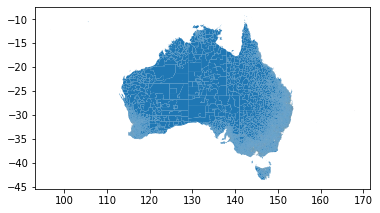

In [3]:
gdf.plot()

       MB_CODE_2021 MB_CATEGORY_2021 CHANGE_FLAG_2021 CHANGE_LABEL_2021  \
112738  20000010000        Education                0         No change   
112739  20000021000       Commercial                0         No change   
112740  20000022000       Commercial                0         No change   
112741  20000023000       Commercial                0         No change   
112742  20000031000       Commercial                0         No change   

       SA1_CODE_2021 SA2_CODE_2021          SA2_NAME_2021 SA3_CODE_2021  \
112738   20403106914     204031069  Bright - Mount Beauty         20403   
112739   20403106902     204031069  Bright - Mount Beauty         20403   
112740   20403106902     204031069  Bright - Mount Beauty         20403   
112741   20403106902     204031069  Bright - Mount Beauty         20403   
112742   20403106902     204031069  Bright - Mount Beauty         20403   

           SA3_NAME_2021 SA4_CODE_2021 SA4_NAME_2021 GCCSA_CODE_2021  \
112738  Wodonga - Alpine  

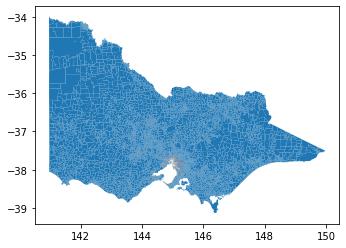

In [20]:
# Extract the data only for Victoria
gdf_vic_only = gdf[gdf['STATE_NAME_2021'] == 'Victoria']

# Plot Victoria
gdf_vic_only.plot()

print(gdf_vic_only.head())
print(set(gdf_vic_only['GCCSA_NAME_2021']))
print("This is SA4_NAME_2021 ", set(gdf_vic_only['SA4_NAME_2021']))
print("\n")
print("This is SA3_NAME_2021 ", set(gdf_vic_only['SA3_NAME_2021']))
print("\n")
print("This is SA2_NAME_2021 ", set(gdf_vic_only['SA2_NAME_2021']))


In [20]:
import requests

url = 'https://services6.arcgis.com/GB33F62SbDxJjwEL/ArcGIS/rest/services/Vicmap_Features_of_Interest/FeatureServer/8/query?where=UFI%3E100&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&resultType=none&distance=0.0&units=esriSRUnit_Meter&relationParam=&returnGeodetic=false&outFields=&returnGeometry=true&featureEncoding=esriDefault&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=&defaultSR=&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnQueryGeometry=false&returnDistinctValues=false&cacheHint=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pjson&token='
params = dict(
    where = 'PRIMARY SCHOOL'
)
resp = requests.get(url=url, params=params)
print(resp.text)
data = resp.json() # Check the JSON Response Content documentation below
print(data)


{
  "objectIdFieldName" : "OBJECTID", 
  "uniqueIdField" : 
  {
    "name" : "OBJECTID", 
    "isSystemMaintained" : true
  }, 
  "globalIdFieldName" : "", 
  "geometryType" : "esriGeometryPoint", 
  "spatialReference" : {
    "wkid" : 7899, 
    "latestWkid" : 7899
  }, 
  "fields" : [
    {
      "name" : "PLACE_NAME", 
      "type" : "esriFieldTypeString", 
      "alias" : "PLACE_NAME", 
      "sqlType" : "sqlTypeOther", 
      "length" : 100, 
      "domain" : null, 
      "defaultValue" : null
    }
  ], 
  "exceededTransferLimit" : true, 
  "features" : [
    {
      "attributes" : {
        "PLACE_NAME" : "CLAUSCEN STREET"
      }, 
      "geometry" : 
      {
        "x" : 2504963.7549231108, 
        "y" : 2416326.3500129953
      }
    }, 
    {
      "attributes" : {
        "PLACE_NAME" : "CARMODY DRIVE KINDERGARTEN"
      }, 
      "geometry" : 
      {
        "x" : 2481318.9333759514, 
        "y" : 2415819.7938039089
      }
    }, 
    {
      "attributes" : {
        